In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.clinical.csv',
                index_col=0)

In [4]:
df.head()

,age_at_diagnosis,days_to_death,days_to_last_followup,ethnicity,gender,race,tissue,vital_status,DPA1_allele1,DPA1_allele2,DPB1_allele1,DPB1_allele2,DQA1_allele1,DQA1_allele2,DQB1_allele1,DQB1_allele2,DRB1_allele1,DRB1_allele2,DRB1_homozygosity
TCGA-02-0001,44.0,358.0,279.0,NOT HISPANIC OR LATINO,FEMALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0003,50.0,144.0,144.0,NOT HISPANIC OR LATINO,MALE,WHITE,GBM,Dead,DPA10103,DPA10103,DPB10402,DPB10201,DQA10102,DQA10303,DQB10602,DQB10301,DRB1_1501,DRB1_0401,False
TCGA-02-0004,59.0,345.0,345.0,NOT HISPANIC OR LATINO,MALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0006,56.0,558.0,558.0,NOT HISPANIC OR LATINO,FEMALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0007,40.0,705.0,705.0,NOT HISPANIC OR LATINO,FEMALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index([u'age_at_diagnosis', u'days_to_death', u'days_to_last_followup',
       u'ethnicity', u'gender', u'race', u'tissue', u'vital_status',
       u'DPA1_allele1', u'DPA1_allele2', u'DPB1_allele1', u'DPB1_allele2',
       u'DQA1_allele1', u'DQA1_allele2', u'DQB1_allele1', u'DQB1_allele2',
       u'DRB1_allele1', u'DRB1_allele2', u'DRB1_homozygosity'],
      dtype='object')

In [6]:
df.age_at_diagnosis.dropna().astype(float).replace(-1, np.nan).dropna().describe()

count    9665.000000
mean       59.645732
std        13.978020
min        10.000000
25%        51.000000
50%        61.000000
75%        70.000000
max        90.000000
Name: age_at_diagnosis, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

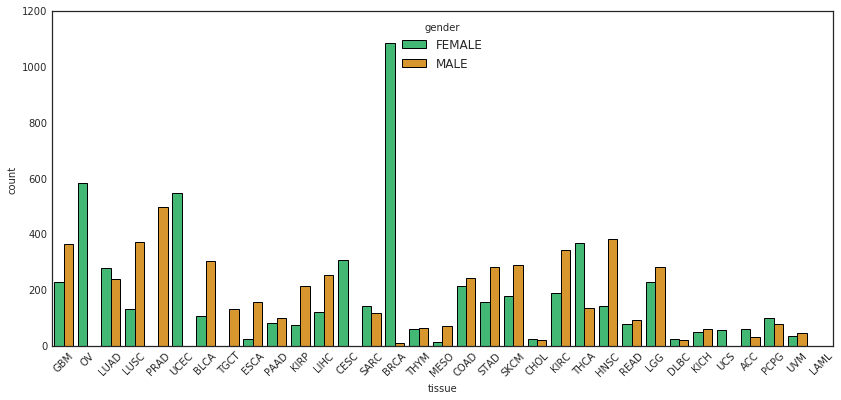

In [10]:
plt.figure(figsize=(14, 6))
sns.countplot(x='tissue', hue='gender', data=df, palette=['#2ECC71', '#F39C12'])
plt.xticks(rotation=45)

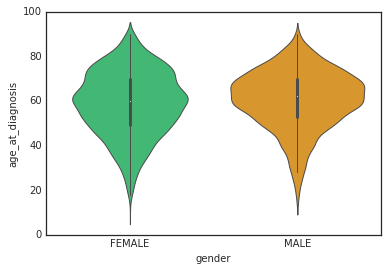

In [11]:
sns.violinplot(x='gender', y='age_at_diagnosis', data=df[df.age_at_diagnosis > 0],
              palette=['#2ECC71', '#F39C12'])

In [7]:
valid_age = df.age_at_diagnosis > 0
sp.ttest_ind(df[valid_age&(df.gender == 'FEMALE')].age_at_diagnosis,
             df[valid_age&(df.gender == 'MALE')].age_at_diagnosis)

Ttest_indResult(statistic=-5.9843035049601001, pvalue=2.2504217531267534e-09)

In [8]:
print df[valid_age&(df.gender == 'FEMALE')].age_at_diagnosis.mean()
print df[valid_age&(df.gender == 'MALE')].age_at_diagnosis.mean()

58.8549352907
60.5579322638


In [9]:
for tissue in df.tissue.unique():
    print tissue
    try:
        tissue_df = df.tissue == tissue
        print df[tissue_df&valid_age&(df.gender == 'FEMALE')].age_at_diagnosis.mean()
        print df[tissue_df&valid_age&(df.gender == 'MALE')].age_at_diagnosis.mean()
    except:
        None

GBM
57.1130434783
58.2786885246
OV
59.7133105802
nan
LUAD
65.1666666667
65.5236051502
nan
nan
nan
LUSC
67.6511627907
67.1448087432
PRAD
nan
61.006
UCEC
63.9302752294
nan
BLCA
70.0185185185
67.4144736842
TGCT
nan
nan
ESCA
nan
nan
PAAD
64.7469879518
64.9607843137
KIRP
59.5921052632
62.1698113208
LIHC
61.1967213115
58.6181102362
CESC
48.2736156352
nan
SARC
nan
nan
BRCA
58.4031365314
62.5833333333
THYM
nan
nan
MESO
nan
nan
COAD
66.1157407407
67.633744856
STAD
66.5192307692
65.2127659574
SKCM
58.5257142857
58.0278745645
CHOL
nan
nan
KIRC
62.8638743455
59.3410404624
THCA
46.1859838275
50.2058823529
HNSC
64.3450704225
59.6119791667
READ
66.0641025641
63.097826087
LGG
43.3565217391
42.6070175439
DLBC
55.0
57.7727272727
KICH
50.3137254902
51.935483871
UCS
nan
nan
ACC
nan
nan
PCPG
nan
nan
UVM
nan
nan
LAML
40.0
nan


Run on cluster

In [15]:
df.head()

,age_at_diagnosis,days_to_death,days_to_last_followup,ethnicity,gender,race,tissue,vital_status,DPA1_allele1,DPA1_allele2,DPB1_allele1,DPB1_allele2,DQA1_allele1,DQA1_allele2,DQB1_allele1,DQB1_allele2,DRB1_allele1,DRB1_allele2,DRB1_homozygosity
TCGA-02-0001,44.0,358.0,279.0,NOT HISPANIC OR LATINO,FEMALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0003,50.0,144.0,144.0,NOT HISPANIC OR LATINO,MALE,WHITE,GBM,Dead,DPA10103,DPA10103,DPB10402,DPB10201,DQA10102,DQA10303,DQB10602,DQB10301,DRB1_1501,DRB1_0401,False
TCGA-02-0004,59.0,345.0,345.0,NOT HISPANIC OR LATINO,MALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0006,56.0,558.0,558.0,NOT HISPANIC OR LATINO,FEMALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-02-0007,40.0,705.0,705.0,NOT HISPANIC OR LATINO,FEMALE,WHITE,GBM,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# split by tissue
df_age = df.ix[df.age_at_diagnosis.astype(float).replace(-1, np.nan).dropna().index]
old, young = [], []
for tissue in df.tissue.unique():
    median_age = df_age[df_age.tissue == tissue].age_at_diagnosis.median()
    young.extend(list(df_age[(df_age.tissue == tissue)&(df_age.age_at_diagnosis <= median_age)].index))
    old.extend(list(df_age[(df_age.tissue == tissue)&(df_age.age_at_diagnosis > median_age)].index))
print len(young), len(old)

for class_label in ['class_i', 'class_ii']:
    patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.{0}.csv'.format(class_label),
                                     index_col=0)
    patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv',
                                     index_col=0)
    out = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/'
    patient_affinities.ix[young].to_csv(out + 'patient_affinities.{0}.young_by_tissue.csv'.format(class_label))
    patient_affinities.ix[old].to_csv(out + 'patient_affinities.{0}.old_by_tissue.csv'.format(class_label))

    patient_mutations.ix[young].to_csv(out + 'patient_mutations.{0}.young_by_tissue.csv'.format(class_label))
    patient_mutations.ix[old].to_csv(out + 'patient_mutations.{0}.old_by_tissue.csv'.format(class_label))

4980 4685


In [27]:
# split for pan
for class_label in ['class_i', 'class_ii']:
    patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.{0}.csv'.format(class_label),
                                     index_col=0)
    patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv',
                                     index_col=0)
    young = [x for x in df[df.age_at_diagnosis <= 60].index if x in patient_affinities.index]
    old = [x for x in df[df.age_at_diagnosis > 60].index if x in patient_affinities.index]
    print len(young), len(old)
    out = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/'
    patient_affinities.ix[young].to_csv(out + 'patient_affinities.{0}.young.csv'.format(class_label))
    patient_affinities.ix[old].to_csv(out + 'patient_affinities.{0}.old.csv'.format(class_label))

    patient_mutations.ix[young].to_csv(out + 'patient_mutations.{0}.young.csv'.format(class_label))
    patient_mutations.ix[old].to_csv(out + 'patient_mutations.{0}.old.csv'.format(class_label))

3625 3286
3625 3286


In [39]:
def create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR.age.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        #out_file.write("#$ -t 1-4\n".format(len(thresholds)))
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=30G\n")
        out_file.write("#$ -tc 100\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("set tissue_fs=({0})\n".format(" ".join(tissue_fs)))
        out_file.write("set mut_fs=({0})\n".format(" ".join(mut_fs)))
        out_file.write("set aff1_fs=({0})\n".format(" ".join(aff1_fs)))
        out_file.write("set aff2_fs=({0})\n".format(" ".join(aff2_fs)))
        out_file.write("set names=({0})\n".format(" ".join(names)))
        out_file.write("set pans=({0})\n".format(" ".join(pans)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("set tissue_f=$tissue_fs[$SGE_TASK_ID]\n")
        out_file.write("set mut_f=$mut_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff1_f=$aff1_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff2_f=$aff2_fs[$SGE_TASK_ID]\n")
        out_file.write("set name=$names[$SGE_TASK_ID]\n")
        out_file.write("set pan=$pans[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR.R $threshold $model $tissue_f $mut_f $aff1_f $aff2_f $name $pan\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [40]:
# age by tissue
class_label = ['class_i']*4 + ['class_ii']*4
models = ['0']*8
pans = ['0', '0', '1', '1']*2
thresholds = ['2']*8
tissue_fs = ['patient_tissues.csv']*8
mut_fs = ['combined_classes/patient_mutations.{0}.young_by_tissue.csv'.format('class_i'),
           'combined_classes/patient_mutations.{0}.old_by_tissue.csv'.format('class_i')]*2 + \
            ['combined_classes/patient_mutations.{0}.young_by_tissue.csv'.format('class_ii'),
           'combined_classes/patient_mutations.{0}.old_by_tissue.csv'.format('class_ii')]*2
aff1_fs = ['combined_classes/patient_affinities.{0}.young_by_tissue.csv'.format('class_i'),
           'combined_classes/patient_affinities.{0}.old_by_tissue.csv'.format('class_i')]*2 + \
            ['combined_classes/patient_affinities.{0}.young_by_tissue.csv'.format('class_ii'),
           'combined_classes/patient_affinities.{0}.old_by_tissue.csv'.format('class_ii')]*2
# these are never referenced
aff2_fs = (['patient_affinities.cancer.all.csv', 'patient_affinities.passenger.csv'])*4
names = ['{0}.young_by_tissue'.format('class_i'), 
         '{0}.old_by_tissue'.format('class_i')]*2 + \
        ['{0}.young_by_tissue'.format('class_ii'), 
         '{0}.old_by_tissue'.format('class_ii')]*2

In [53]:
# pan-cancer
class_label = ['class_i']*4 + ['class_ii']*4
models = ['0']*8
pans = ['0', '0', '1', '1']*2
thresholds = ['2']*8
tissue_fs = ['patient_tissues.csv']*8
mut_fs = ['combined_classes/patient_mutations.{0}.young.csv'.format('class_i'),
           'combined_classes/patient_mutations.{0}.old.csv'.format('class_i')]*2 + \
            ['combined_classes/patient_mutations.{0}.young.csv'.format('class_ii'),
           'combined_classes/patient_mutations.{0}.old.csv'.format('class_ii')]*2
aff1_fs = ['combined_classes/patient_affinities.{0}.young.csv'.format('class_i'),
           'combined_classes/patient_affinities.{0}.old.csv'.format('class_i')]*2 + \
            ['combined_classes/patient_affinities.{0}.young.csv'.format('class_ii'),
           'combined_classes/patient_affinities.{0}.old.csv'.format('class_ii')]*2
# these are never referenced
aff2_fs = (['patient_affinities.cancer.all.csv', 'patient_affinities.passenger.csv'])*4
names = ['{0}.young'.format('class_i'), 
         '{0}.old'.format('class_i')]*2 + \
        ['{0}.young'.format('class_ii'), 
         '{0}.old'.format('class_ii')]*2

In [54]:
names

['class_i.young',
 'class_i.old',
 'class_i.young',
 'class_i.old',
 'class_ii.young',
 'class_ii.old',
 'class_ii.young',
 'class_ii.old']

In [55]:
create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans)

Visualize results

In [12]:
MI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_i.young.txt',
           sep= ' ')
FI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_i.old.txt',
           sep= ' ')
MI['Class'] = 'I'
FI['Class'] = 'I'
MI['Age'] = 'Young'
FI['Age'] = 'Old'
MII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_ii.young.txt',
           sep= ' ')
FII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_ii.old.txt',
           sep= ' ')
MII['Class'] = 'II'
FII['Class'] = 'II'
MII['Age'] = 'Young'
FII['Age'] = 'Old'

In [16]:
pan = pd.concat([MI, FI, MII, FII])
pan['Error'] = pan['OR'] - pan['conf_OR_low']
pan = pan.ix['mutation']

In [17]:
pan

,OR,conf_OR_low,conf_OR_high,P,Class,Age,Error
mutation,1.291209,1.250983,1.332730,2.015489e-56,I,Young,0.040227
mutation,1.154332,1.120477,1.189211,3.389268e-21,I,Old,0.033855
mutation,1.311588,1.265183,1.359695,2.714292e-49,II,Young,0.046405
mutation,1.149835,1.112631,1.188283,8.803322e-17,II,Old,0.037204


In [20]:
# tissue

FI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_i.young.txt',
           sep= ',').sort_values('OR', ascending=False)
MI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_i.old.txt',
           sep= ',').sort_values('OR', ascending=False)
FI['Age'] = 'Young'
MI['Age'] = 'Old'
I = pd.concat([FI, MI])
I['Tissue'] = I.index

FII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_ii.young.txt',
           sep= ',').sort_values('OR', ascending=False)
MII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_ii.old.txt',
           sep= ',').sort_values('OR', ascending=False)
FII['Age'] = 'Young'
MII['Age'] = 'Old'
II = pd.concat([FII, MII])
II['Tissue'] = II.index
I['Error'] = I['OR'] - I['Lci']
II['Error'] = II['OR'] - II['Lci']

In [22]:
I.head()

,OR,Lci,Hci,P,Age,Tissue,Error
THCA,2.342362,2.068506,2.652475,4.759600e-41,Young,THCA,0.273856
LGG,1.553677,1.445344,1.670129,6.582472e-33,Young,LGG,0.108333
SKCM,1.300223,1.190882,1.419603,4.687103e-09,Young,SKCM,0.109341
GBM,1.189118,1.041617,1.357507,1.036412e-02,Young,GBM,0.147501
COAD,1.186884,1.046956,1.345515,7.429638e-03,Young,COAD,0.139929


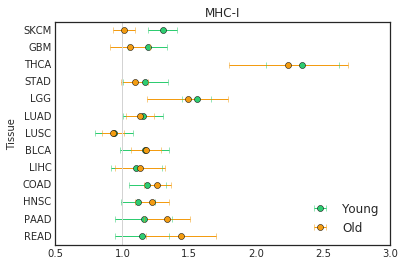

In [44]:
pldf = I
cat = 'Age'
cat_name1 = 'Young'
cat_name2 = 'Old'
ordered_tissues = (pldf[pldf[cat] == cat_name1].OR - pldf[pldf[cat] == cat_name2].OR).sort_values(ascending=False).index
pldf = pldf.ix[ordered_tissues]
plt.axvline(1, color='lightgrey')
plt.errorbar(pldf[pldf[cat] == cat_name1].OR, range(len(pldf[pldf[cat] == cat_name1]))[::-1], 
             xerr=list(pldf[pldf[cat] == cat_name1].Error), fmt='o', 
             color='#2ECC71', label=cat_name1)
plt.errorbar(pldf[pldf[cat] == cat_name2].OR, range(len(pldf[pldf[cat] == cat_name2]))[::-1], 
             xerr=list(pldf[pldf[cat] == cat_name2].Error), fmt='o', 
             color='#F39C12', label=cat_name2)
plt.yticks(range(len(pldf[pldf[cat] == cat_name2]))[::-1], list(pldf[pldf[cat] == cat_name2].Tissue))
plt.ylabel('Tissue')
plt.ylim(-0.5, len(pldf[pldf[cat] == cat_name2])-0.5)
plt.title('MHC-I')
plt.legend(loc=4)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/OR.tissue.age.MHCI.pdf')

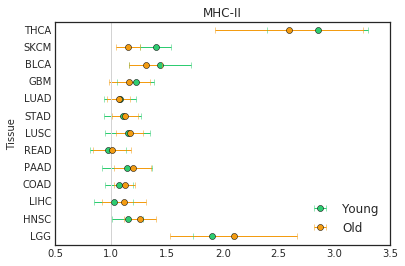

In [43]:
pldf = II
cat = 'Age'
cat_name1 = 'Young'
cat_name2 = 'Old'

ordered_tissues = (pldf[pldf[cat] == cat_name1].OR - pldf[pldf[cat] == cat_name2].OR).sort_values(ascending=False).index
pldf = pldf.ix[ordered_tissues]
plt.axvline(1, color='lightgrey')
plt.errorbar(pldf[pldf[cat] == cat_name1].OR, range(len(pldf[pldf[cat] == cat_name1]))[::-1], 
             xerr=list(pldf[pldf[cat] == cat_name1].Error), fmt='o', 
             color='#2ECC71', label=cat_name1)
plt.errorbar(pldf[pldf[cat] == cat_name2].OR, range(len(pldf[pldf[cat] == cat_name2]))[::-1], 
             xerr=list(pldf[pldf[cat] == cat_name2].Error), fmt='o', 
             color='#F39C12', label=cat_name2)
plt.yticks(range(len(pldf[pldf[cat] == cat_name2]))[::-1], list(pldf[pldf[cat] == cat_name2].Tissue))
plt.ylabel('Tissue')
plt.ylim(-0.5, len(pldf[pldf[cat] == cat_name2])-0.5)
plt.title('MHC-II')
plt.legend(loc=4)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/OR.tissue.age.MHCII.pdf')

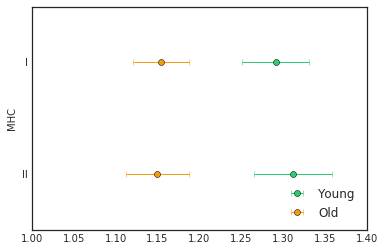

In [18]:
cat = 'Age'
cat_name1 = 'Young'
cat_name2 = 'Old'

plt.errorbar(pan[pan[cat] == cat_name1].OR, range(len(pan[pan[cat] == cat_name1]))[::-1], 
             xerr=list(pan[pan[cat] == cat_name1].Error), fmt='o', 
             color='#2ECC71', label=cat_name1)
plt.errorbar(pan[pan[cat] == cat_name2].OR, range(len(pan[pan[cat] == cat_name2]))[::-1], 
             xerr=list(pan[pan[cat] == cat_name2].Error), fmt='o', 
             color='#F39C12', label=cat_name2)
plt.yticks([1, 0], list(pan[pan[cat] == cat_name2].Class))
plt.ylabel('MHC')
plt.ylim(-0.5, 1.5)
plt.xlim(1, 1.4)
plt.legend(loc=4)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/OR.age.pan.pdf')

Explore age distribution in SKCM

In [26]:
skcm_df = df[df.tissue == 'SKCM']

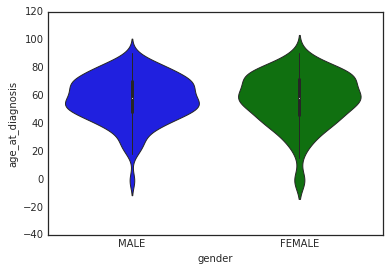

In [28]:
sns.violinplot(x='gender', y='age_at_diagnosis', data=skcm_df)

In [38]:
print skcm_df[skcm_df.gender == 'FEMALE'].age_at_diagnosis.replace(-1, np.nan).dropna().mean()
print skcm_df[skcm_df.gender == 'MALE'].age_at_diagnosis.replace(-1, np.nan).dropna().mean()

58.5257142857
58.0278745645
